<h3>Load Libraries</h3>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlibbbbbbbbb inline

<h5>define function to show images</h5>

In [2]:
def show_image(image):
    plt.imshow(image)
    plt.show()

<h3>Define Convolutional function</h3>

In [3]:
def conv( img, filter_, stride=1, padding=0 ):
    kernel = filter_.shape[0]
    w = int( ( ( img.shape[1] - kernel + ( 2 * padding ) ) / stride ) + 1 )
    h = int( ( ( img.shape[0] - kernel + ( 2 * padding ) ) / stride ) + 1 )
    new = np.zeros( [ h, w, img.shape[2] ] )
    
    #for i in range( img.shape[2] ):
    for k in range( 0, img.shape[0], kernel ):
        for j in range( 0, img.shape[1], stride ):
            try:
                new[k, j, 0] = np.sum( np.multiply( img[ k:k+kernel, j:j+kernel, 0 ], filter_ ) )
                new[k, j, 1] = np.sum( np.multiply( img[ k:k+kernel, j:j+kernel, 1 ], filter_ ) )
                new[k, j, 2] = np.sum( np.multiply( img[ k:k+kernel, j:j+kernel, 2 ], filter_ ) )
            except:
                pass
    return new

<h5>load image</h5>

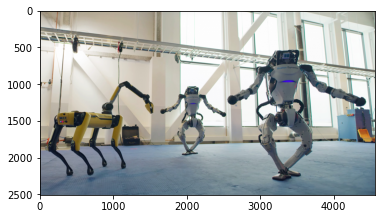

In [4]:
img = cv2.imread("sample_image.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
show_image(img/255)

<h4>Apply Convolutional</h4>

In [5]:
new = conv(img/255, np.array( [ [ 1, 0, 1 ], [ 0, 1, 0 ], [ 1, 1, 1 ] ] ))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


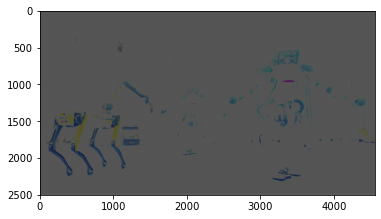

In [6]:
show_image(new)

<h3>Sobel</h3>

In [7]:
filter2 = np.array([[-1, 0, 1],   
                    [-1, 0, 1],   
                    [-1, 0, 1]])  

<h4>Vertical edges</h4>

In [8]:
filt1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
x = conv(img/255, filt1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


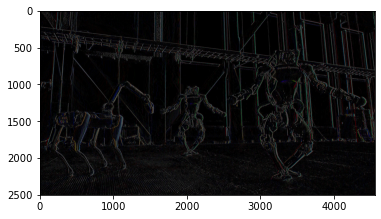

In [9]:
show_image((x-x.mean())/np.std(x))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


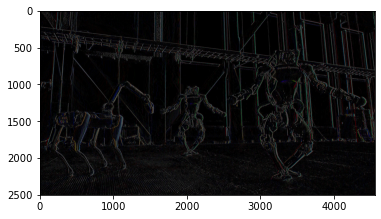

In [15]:
plt.imshow((x-x.mean())/np.std(x), cmap='gray')
plt.show()

<h4>Horizontal edges</h4>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


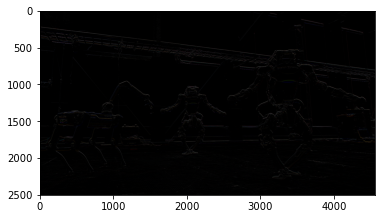

In [11]:
y = conv(img/255, np.flip(filt1.T, axis=0))
plt.imshow(y, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


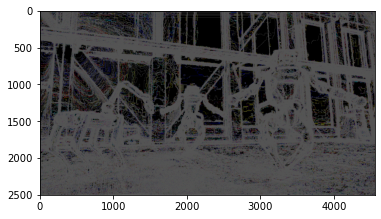

In [13]:
final = np.sqrt(np.square(x) + np.square(y))
final *= 255.0 / final.max()
plt.imshow(final, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


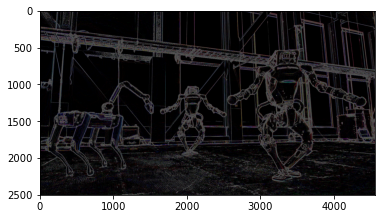

In [14]:
plt.imshow((final-final.mean())/np.std(final) , cmap='gray')
plt.show()            